In [92]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [93]:
# Load the data from the CSV file
oil_data = pd.read_csv(os.path.join(os.getcwd(), "data", "wti.csv"))

Descriptive Statistics:
 count    251.000000
mean       2.559721
std        0.453433
min        1.940000
25%        2.205000
50%        2.390000
75%        2.910000
max        3.850000
Name: Price, dtype: float64

Skewness:  0.825108939143346 (positively skewed)


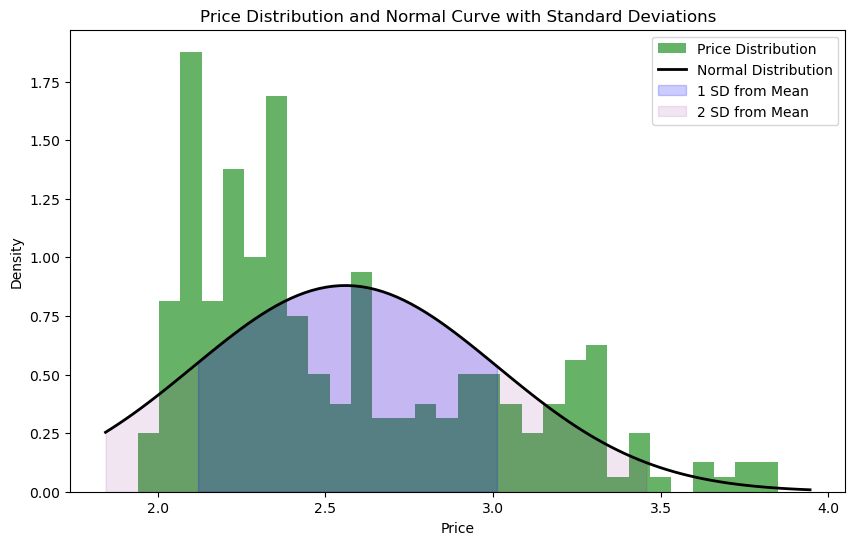

Percentage of data within 1 SD of the mean: 68.53%
Percentage of data within 2 SD of the mean: 96.81%


In [94]:

# Convert the 'Price' column to numeric, handling any missing values
oil_data['Price'] = pd.to_numeric(oil_data['Price'], errors='coerce').dropna()

# Descriptive statistics
mean_price = oil_data['Price'].mean()
std_dev_price = oil_data['Price'].std()
skewness = stats.skew(oil_data['Price'])
desc_stats = oil_data['Price'].describe()

# Determine skewness direction
skew_direction = 'positively skewed' if skewness > 0 else 'negatively skewed'

# Print descriptive statistics and skewness information
print("Descriptive Statistics:\n", desc_stats)
print("\nSkewness: ", skewness, f"({skew_direction})")

# Plot the data distribution and normal curve
plt.figure(figsize=(10, 6))

# Plot histogram of prices
oil_data['Price'].plot(kind='hist', bins=30, density=True, alpha=0.6, color='g', label='Price Distribution')

# Plot the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_price, std_dev_price)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

# Shade 1 SD region
plt.fill_between(x, p, where=(x > mean_price - std_dev_price) & (x < mean_price + std_dev_price), color='blue', alpha=0.2, label='1 SD from Mean')

# Shade 2 SD region
plt.fill_between(x, p, where=(x > mean_price - 2 * std_dev_price) & (x < mean_price + 2 * std_dev_price), color='purple', alpha=0.1, label='2 SD from Mean')

plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Price Distribution and Normal Curve with Standard Deviations")
plt.legend()

# Show the plot
plt.show()

# Calculate percentages within 1 and 2 SD of the mean
within_1_sd = np.mean((oil_data['Price'] > mean_price - std_dev_price) & (oil_data['Price'] < mean_price + std_dev_price)) * 100
within_2_sd = np.mean((oil_data['Price'] > mean_price - 2 * std_dev_price) & (oil_data['Price'] < mean_price + 2 * std_dev_price)) * 100

print(f"Percentage of data within 1 SD of the mean: {within_1_sd:.2f}%")
print(f"Percentage of data within 2 SD of the mean: {within_2_sd:.2f}%")


With an average price of about $2.55 per barrel over the course of 1 year (11/10/2023 - 11/08/2024), this represents a fat tailed distribution.

The function `scipy.stats.pareto.fit` in the SciPy library is used to fit a Pareto distribution to a dataset. When you pass in your data, this function estimates the parameters of the Pareto distribution that best fit your data, using maximum likelihood estimation.

## Pareto Distribution in SciPy

In SciPy, the Pareto distribution is defined as follows:

$$
f(x; b) = \frac{b}{x^{b + 1}} \quad \text{for } x \geq 1
$$

Where:
- \( b \) is the shape parameter, also known as the tail index. Lower values of \( b \) indicate a heavier (or fatter) tail.


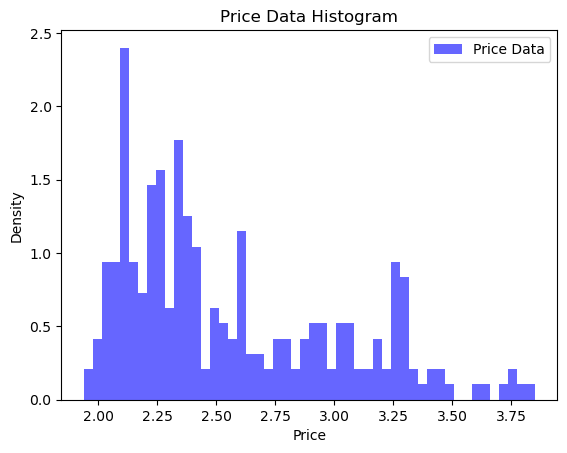

108288813.3448792

In [95]:
# Check if 'Price' column exists
if "Price" not in oil_data.columns:
    raise ValueError("Dataframe must contain a 'Price' column")

# Convert 'Price' to numerical values if not already
oil_data["Price"] = pd.to_numeric(oil_data["Price"], errors="coerce")

# Drop NaN values in the 'Price' column
prices = oil_data["Price"].dropna()

# Calculate the tail index (alpha) for the Pareto distribution
tail_index, _, _ = stats.pareto.fit(prices)

# Fat-tailed if alpha (tail index) is between 0 and 2
is_fat_tailed = 0 < tail_index < 2

# Plot the price data for visual inspection
plt.hist(prices, bins=50, density=True, alpha=0.6, color="blue", label="Price Data")
plt.title("Price Data Histogram")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend()
plt.show()

tail_index


In [96]:
def calculate_tail_index(data, top_percent=0.1):
    """
    Calculates the tail index of a dataset using the Hill Estimator method.

    Parameters:
        data (array-like): The dataset to analyze.
        top_percent (float): The proportion of the largest values to use for tail index calculation (e.g., 0.1 for top 10%).

    Returns:
        float: The estimated tail index.
    """
    # Ensure data is a NumPy array
    data = np.array(data)
    
    # Step 1: Sort data in ascending order
    sorted_data = np.sort(data)
    
    # Step 2: Select the top k largest values (e.g., top 10% of the data)
    k = int(len(sorted_data) * top_percent)
    tail_data = sorted_data[-k:]  # Get top k values
    
    # Step 3: Calculate x_min (minimum of the tail data) and apply the Hill Estimator formula
    x_min = tail_data.min()
    tail_index = 1 / np.mean(np.log(tail_data / x_min))
    
    return tail_index

In [97]:
calculate_tail_index(oil_data["Price"], top_percent=0.8)

4.682859310583186

In [98]:
is_fat_tailed

False

Although Mathematically this distribution isn't a Pareto distribution, it sure looks like one! This reflects the poor year investors had. The stock has falled considerably.

In [99]:
btc_data = pd.read_csv(os.path.join(os.getcwd(), "data", "btc.csv"))

# Clean numeric columns by removing commas and converting to float
for col in ['Price', 'Open', 'High', 'Low']:
    btc_data[col] = pd.to_numeric(btc_data[col].str.replace(',', ''), errors='coerce')


Descriptive Statistics:
 count      367.000000
mean     58114.555586
std      10791.848940
min      35549.300000
25%      47442.850000
50%      61685.300000
75%      66687.100000
max      78608.400000
Name: Price, dtype: float64

Skewness:  -0.6326456981353679 (negatively skewed)


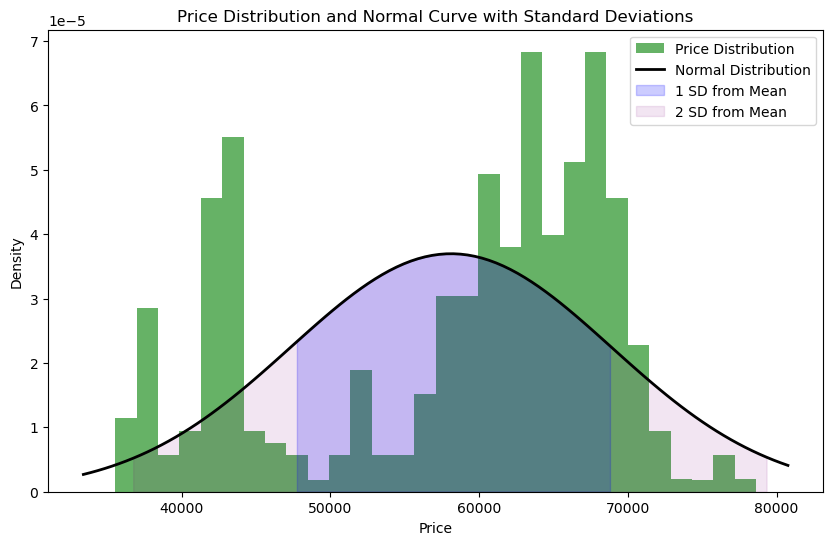

Percentage of data within 1 SD of the mean: 62.94%
Percentage of data within 2 SD of the mean: 98.91%


In [100]:

# Convert the 'Price' column to numeric, handling any missing values
btc_data['Price'] = pd.to_numeric(btc_data['Price'], errors='coerce').dropna()

# Descriptive statistics
mean_price = btc_data['Price'].mean()
std_dev_price = btc_data['Price'].std()
skewness = stats.skew(btc_data['Price'])
desc_stats = btc_data['Price'].describe()

# Determine skewness direction
skew_direction = 'positively skewed' if skewness > 0 else 'negatively skewed'

# Print descriptive statistics and skewness information
print("Descriptive Statistics:\n", desc_stats)
print("\nSkewness: ", skewness, f"({skew_direction})")

# Plot the data distribution and normal curve
plt.figure(figsize=(10, 6))

# Plot histogram of prices
btc_data['Price'].plot(kind='hist', bins=30, density=True, alpha=0.6, color='g', label='Price Distribution')

# Plot the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_price, std_dev_price)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

# Shade 1 SD region
plt.fill_between(x, p, where=(x > mean_price - std_dev_price) & (x < mean_price + std_dev_price), color='blue', alpha=0.2, label='1 SD from Mean')

# Shade 2 SD region
plt.fill_between(x, p, where=(x > mean_price - 2 * std_dev_price) & (x < mean_price + 2 * std_dev_price), color='purple', alpha=0.1, label='2 SD from Mean')

plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Price Distribution and Normal Curve with Standard Deviations")
plt.legend()

# Show the plot
plt.show()

# Calculate percentages within 1 and 2 SD of the mean
within_1_sd = np.mean((btc_data['Price'] > mean_price - std_dev_price) & (btc_data['Price'] < mean_price + std_dev_price)) * 100
within_2_sd = np.mean((btc_data['Price'] > mean_price - 2 * std_dev_price) & (btc_data['Price'] < mean_price + 2 * std_dev_price)) * 100

print(f"Percentage of data within 1 SD of the mean: {within_1_sd:.2f}%")
print(f"Percentage of data within 2 SD of the mean: {within_2_sd:.2f}%")


This is definitely not a Pareto distribution, and it doesn't look like one either. This looks more like a normal dist, but with 2 humps which infers bimodality. This is because in 2023 the price was at a steady 40k, and then it increased suddenly and drastically between 01/24 - 03/24. The two populations we're seeing is 2023 prices and 2024 prices. Since the increase was so sudden and drastic, the skewness is still barely negative. Since the price has stablized around $65,000, we can see the second 'hump' forming. My data is also slightly outdated, over the weekend the price has gone up a considerable %14, which would obviously affect the skewing positively.

In [101]:
btc2_data = pd.read_csv(os.path.join(os.getcwd(), "data", "btc2.csv"))

# Clean numeric columns by removing commas and converting to float
for col in ['Price', 'Open', 'High', 'Low']:
    btc2_data[col] = pd.to_numeric(btc2_data[col].str.replace(',', ''), errors='coerce')


Descriptive Statistics:
 count      369.000000
mean     58283.001084
std      10998.319489
min      35549.300000
25%      47758.200000
50%      61699.700000
75%      66773.100000
max      88664.100000
Name: Price, dtype: float64

Skewness:  -0.5228560629407235 (negatively skewed)


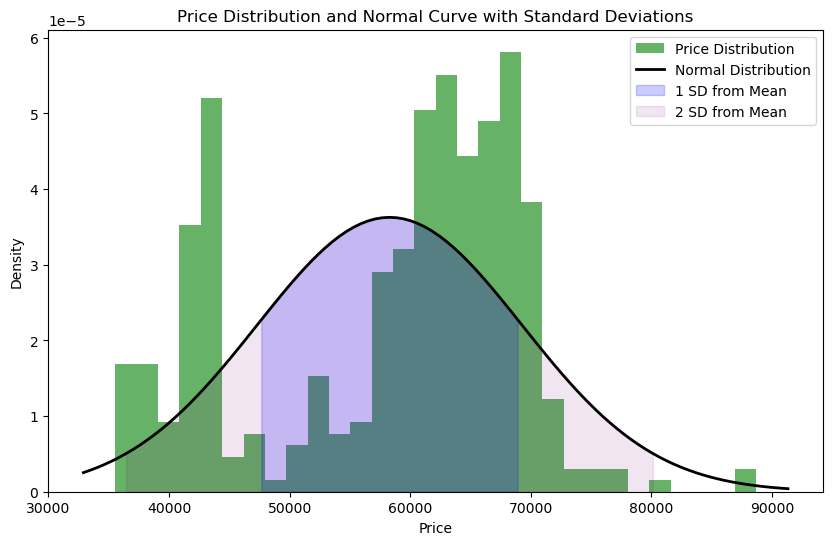

Percentage of data within 1 SD of the mean: 63.69%
Percentage of data within 2 SD of the mean: 98.37%


In [102]:

# Convert the 'Price' column to numeric, handling any missing values
btc2_data['Price'] = pd.to_numeric(btc2_data['Price'], errors='coerce').dropna()

# Descriptive statistics
mean_price = btc2_data['Price'].mean()
std_dev_price = btc2_data['Price'].std()
skewness = stats.skew(btc2_data['Price'])
desc_stats = btc2_data['Price'].describe()

# Determine skewness direction
skew_direction = 'positively skewed' if skewness > 0 else 'negatively skewed'

# Print descriptive statistics and skewness information
print("Descriptive Statistics:\n", desc_stats)
print("\nSkewness: ", skewness, f"({skew_direction})")

# Plot the data distribution and normal curve
plt.figure(figsize=(10, 6))

# Plot histogram of prices
btc2_data['Price'].plot(kind='hist', bins=30, density=True, alpha=0.6, color='g', label='Price Distribution')

# Plot the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_price, std_dev_price)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

# Shade 1 SD region
plt.fill_between(x, p, where=(x > mean_price - std_dev_price) & (x < mean_price + std_dev_price), color='blue', alpha=0.2, label='1 SD from Mean')

# Shade 2 SD region
plt.fill_between(x, p, where=(x > mean_price - 2 * std_dev_price) & (x < mean_price + 2 * std_dev_price), color='purple', alpha=0.1, label='2 SD from Mean')

plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Price Distribution and Normal Curve with Standard Deviations")
plt.legend()

# Show the plot
plt.show()

# Calculate percentages within 1 and 2 SD of the mean
within_1_sd = np.mean((btc2_data['Price'] > mean_price - std_dev_price) & (btc2_data['Price'] < mean_price + std_dev_price)) * 100
within_2_sd = np.mean((btc2_data['Price'] > mean_price - 2 * std_dev_price) & (btc2_data['Price'] < mean_price + 2 * std_dev_price)) * 100

print(f"Percentage of data within 1 SD of the mean: {within_1_sd:.2f}%")
print(f"Percentage of data within 2 SD of the mean: {within_2_sd:.2f}%")


It still is slightly negatively skewed, but graphs sometimes play tricks on us because it looks positively skewed.